In [8]:
import os
import sqlite3

import matplotlib.pyplot as plt
import nfts.dataset
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import zeta

In [9]:
os.listdir("./")
DATASET_PATH = "./nfts.sqlite"

In [10]:
ds = nfts.dataset.FromSQLite(DATASET_PATH)

In [4]:
nfts.dataset.explain()


The Moonstream NFTs dataset

To load the NFTs dataset from a SQLite file, run:
>>> ds = nfts.dataset.FromSQLite(<path to sqlite database>)

This dataset consists of the following dataframes:

Dataframe: nfts
Load using:
	nfts_df = ds.load_dataframe(<sqlite connection or path to sqlite db>, "nfts")

Describes the NFT contracts represented in this dataset, with a name and symbol if they were available at time of crawl.

Columns:
1. address: The Ethereum address of the NFT contract.
2. name: The name of the collection of NFTs that the contract represents.
3. symbol: The symbol of the collection of NFTs that the contract represents.

- - -

Dataframe: mints
Load using:
	mints_df = ds.load_dataframe(<sqlite connection or path to sqlite db>, "mints")

All token mint events crawled in this dataset.

Columns:
1. event_id: A unique event ID associated with the event.
2. transaction_hash: The hash of the transaction which triggered the event.
3. block_number: The transaction block in which the 

## Level 1: Descriptive Statistical analysis

In [5]:
nfts_df = ds.load_dataframe("nfts")
nfts_df.columns
#nfts_df.head()
#tn=nfts_df.groupby('name')
#tn.describe()
#name_nfts=nfts_df['name']
#name_nfts.sort_values()

Index(['address', 'name', 'symbol'], dtype='object')

In [6]:
nfts_df.describe(exclude=['string'])

,address,name,symbol
count,9388,9352,9355
unique,9388,8554,7595
top,0xF4ee95274741437636e748DdAc70818B4ED7d043,NFT Basket,NFTB
freq,1,68,68


In [7]:
mints_df = ds.load_dataframe("mints")
mints_df.describe()

,block_number,transaction_value,timestamp
count,6.667282e+06,6.667282e+06,6.667282e+06
mean,1.298399e+07,7.811426e+17,1.628406e+09
std,2.752070e+05,3.142126e+19,3.695014e+06
min,1.215024e+07,0.000000e+00,1.617235e+09
25%,1.286010e+07,0.000000e+00,1.626739e+09
50%,1.307939e+07,6.000000e+16,1.629692e+09
75%,1.317799e+07,3.450000e+17,1.631010e+09
max,1.329601e+07,1.890000e+22,1.632587e+09


In [8]:
mints_df.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,6c6d226e-2096-4b50-ac3f-f7078ca3a0c2,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3223,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
1,263c923f-4db9-4d81-a547-27e1fe5ec405,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5077,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
2,8baa8502-42f9-453e-824a-ad504045c9c5,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5070,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
3,364ee658-ff31-4d0a-a7a7-60d3d7822772,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3757,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
4,58d3adc3-03d2-4e7b-b02c-47957c1f5752,0xd44be17c0298717ce001843069b0a2ca08b577fa2b33...,12936414,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,3252202771441387673917605047769619801375983664...,0x0000000000000000000000000000000000000000,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.251726e+15,1627776925


In [9]:
# Get the address who has minted most NFTs
mints_df['nft_address'].mode()


0    0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85
dtype: object

In [10]:
transfers_df = ds.load_dataframe("transfers")
transfers_df.describe()

,block_number,transaction_value,timestamp
count,4.514729e+06,4.514729e+06,4.514729e+06
mean,1.297740e+07,4.060893e+17,1.628318e+09
std,2.752686e+05,4.279892e+18,3.695920e+06
min,1.215025e+07,0.000000e+00,1.617235e+09
25%,1.284892e+07,0.000000e+00,1.626588e+09
50%,1.306464e+07,3.500000e+16,1.629496e+09
75%,1.317597e+07,1.999000e+17,1.630983e+09
max,1.329601e+07,2.275000e+21,1.632587e+09


In [11]:
transfers_df.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,cd816651-56b2-4ed9-887c-c83de732428d,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,6682934142305278177002530107138320246486863356...,0x25f1d709b329C7349b8209851E90eFa3a7f60178,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481
1,82cc5228-eb80-4e0d-9f6f-e644dec3ab06,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,1198507443711741845273832738859307575893198744...,0x0737E7162C88E9FBB963334e4Bfe6e97447fF811,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481
2,6e1f9cc4-d1df-4a6b-972d-a20765beb326,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,1541220344281436903042142177888467401468454835...,0xA0fEc186c4b3FAd39ca373dFdd52E79C2495F2c3,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481
3,43dc27a7-a72d-4894-809c-e868de05f7ee,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,7993840355029527745913866651030234226423689128...,0x90bE22069560A9bAd99543B4A922d1FE34Ae84E9,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481
4,47b7839b-9b87-442d-b2c1-9ebedcad8e06,0x0c73daad5e6946e6b2f1374846d6ba3025d6e6a2569f...,12936373,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,1123719749142984581497870712442861055686734521...,0xA8E9C42Ebb915EeEC5080B7Bcc5D844475595091,0xC69b4c6fFDBaF843A0d0588c99E3C67f27069BEa,0.0,1627776481


In [12]:
top_transfers_df = transfers_df.groupby(["nft_address"], as_index=False).size().rename(columns={"size": "num_tokens"})
top_transfers_df.sort_values("num_tokens", inplace=True, ascending=False)
#top_transfers_df.columns
top_transfers_df.head(5)

,nft_address,num_tokens
2544,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,377831
2265,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,185952
5514,0xa7d8d9ef8D8Ce8992Df33D8b8CF4Aebabd5bD270,135015
1563,0x3B3ee1931Dc30C1957379FAc9aba94D1C48a5405,128212
172,0x06012c8cf97BEaD5deAe237070F9587f8E7A266d,68799


In [14]:
current_owners_df = ds.load_dataframe("current_owners")
current_owners_df.describe()

,nft_address,token_id,owner
count,7020950,7020950,7020950
unique,9292,1179659,625354
top,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205,1,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C
freq,206037,5341,100045


In [14]:
top_owners_df = current_owners_df.groupby(["owner"], as_index=False).size().rename(columns={"size": "num_tokens"})
top_owners_df.sort_values("num_tokens", inplace=True, ascending=False)
top_owners_df.head(5)

,owner,num_tokens
7272,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C,100045
0,0x0000000000000000000000000000000000000000,83548
470227,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,51028
562045,0xcDA72070E455bb31C7690a170224Ce43623d0B6f,50131
369228,0x96bEE49d3386d674bF4E956D9B3ce61b9540409D,36751


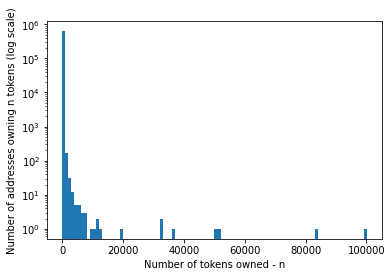

In [15]:
plt.xlabel("Number of tokens owned - n")
plt.ylabel("Number of addresses owning n tokens (log scale)")
_, _, _ = plt.hist(top_owners_df["num_tokens"], bins=100, log=True)

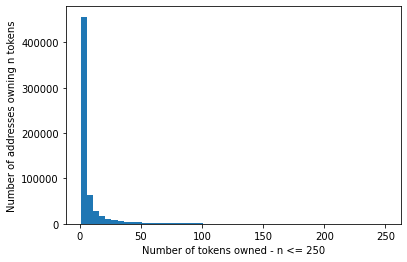

In [16]:
scale_cutoff=250
low_scale_owners = [num_tokens for num_tokens in top_owners_df["num_tokens"] if num_tokens <= scale_cutoff]
plt.xlabel(f"Number of tokens owned - n <= {scale_cutoff}")
plt.ylabel("Number of addresses owning n tokens")
_ = plt.hist(low_scale_owners, bins=int(scale_cutoff/5))

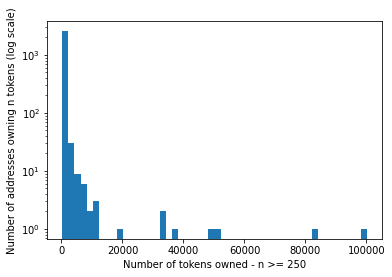

In [17]:
scale_cutoff=250
high_scale_owners = [num_tokens for num_tokens in top_owners_df["num_tokens"] if num_tokens >= scale_cutoff]
plt.xlabel(f"Number of tokens owned - n >= {scale_cutoff}")
plt.ylabel("Number of addresses owning n tokens (log scale)")
_ = plt.hist(high_scale_owners, bins=int(scale_cutoff/5), log=True)

In [18]:
current_market_values_df = ds.load_dataframe("current_market_values")
current_market_values_df.describe()
transfer_statistics_by_address_df = ds.load_dataframe("transfer_statistics_by_address")
transfer_statistics_by_address_df.describe()

,transfers_out,transfers_in
count,509577.000000,509577.000000
mean,8.859758,8.859758
std,262.812952,231.806747
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,5.000000
max,139631.000000,118931.000000


## Level 2

In [19]:
contract_owners_df = current_owners_df.groupby(["nft_address", "owner"], as_index=False).size().rename(columns={"size": "num_tokens"})

In [20]:
contract_owners_df.head(20)

,nft_address,owner,num_tokens
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x429a635eD4DaF9529C07d5406D466B349EC34361,3
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x5e5C817E9264B46cBBB980198684Ad9d14f3e0B4,5
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x8376f63c13b99D3eedfA51ddd77Ff375279B3Ba0,1
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x83D7Da9E572C5ad14caAe36771022C43AF084dbF,5
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x8A73024B39A4477a5Dc43fD6360e446851AD1D28,5
5,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0xA93C50f5b351d5c961fc7b147a01f8068B272712,5
6,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0xF0ab5ED4E9508Fa4274E26e3cF081ABF49bF67a7,1
7,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0xa4BF3313fc02b10732e11Ae8CbB07Cb3ECDE87Cb,1
8,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0xb5e34552F32BA9226C987769BF6555a538510BA8,2
9,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0xb776cAb26B9e6Be821842DC0cc0e8217489a4581,1


In [21]:
contract_owners_groups = contract_owners_df.groupby(["nft_address"])
contract_owners_groups.head()

,nft_address,owner,num_tokens
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x429a635eD4DaF9529C07d5406D466B349EC34361,3
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x5e5C817E9264B46cBBB980198684Ad9d14f3e0B4,5
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x8376f63c13b99D3eedfA51ddd77Ff375279B3Ba0,1
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x83D7Da9E572C5ad14caAe36771022C43AF084dbF,5
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0x8A73024B39A4477a5Dc43fD6360e446851AD1D28,5
...,...,...,...
2046339,0xff9315c2c4c0208Edb5152F4c4eBec75e74010c5,0x0e93CAA186EA40654f065d1B7f03A49eD04E8a49,1
2046340,0xff9315c2c4c0208Edb5152F4c4eBec75e74010c5,0x1932f034bc55c5a0E0e66f87ceffB616c4A6E995,1
2046341,0xff9315c2c4c0208Edb5152F4c4eBec75e74010c5,0x2C27baB9b55D3DFE0119b457334c4099E0b4C365,1
2046359,0xffC6c59F34Cd9f8861012FDDd0c7F1323082Ab86,0x696B1c501c339f7057A0B58d730f2e5614f1CE7d,1


In [22]:
# NFT Collection address of BoredApeYachtClub is 0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D  https://etherscan.io/token/0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d
bayc_owners = contract_owners_df.loc[contract_owners_df['nft_address'] == '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D']
bayc_owners.head(20)
#bayc_owners.describe()

,nft_address,owner,num_tokens
1389307,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x000000000000000000000000000000000000dEaD,1
1389308,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x0000000000015B23C7e20b0eA5eBd84c39dCbE60,1
1389309,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x000001f568875F378Bf6d170B790967FE429C81A,1
1389310,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x00000217d2795F1Da57e392D2a5bC87125BAA38D,1
1389311,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x001511D1CF99D0287f65945498d34e526cc40849,1
1389312,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x001aBa7087F49a135FFB121A40684416824E9C34,1
1389313,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x001fd093d89b24f7DE35Bc47B6d01C750F398707,1
1389314,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x0035Fc5208eF989c28d47e552E92b0C507D2B318,1
1389315,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x0037e222bd8f047A453B9ed0b04067c95e56BCb3,2
1389316,0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D,0x003F35595dce3187B4Fff2B5A2c4303f7158208a,1


In [23]:
# NFT Collection address of WyldFrogz is 0x374DBF0dF7aBc89C2bA776F003E725177Cb35750 https://etherscan.io/token/0x374DBF0dF7aBc89C2bA776F003E725177Cb35750
wf_owners = contract_owners_df.loc[contract_owners_df['nft_address'] == '0x374DBF0dF7aBc89C2bA776F003E725177Cb35750']
wf_owners.head(20)
wf_owners.describe()

,num_tokens
count,14.000000
mean,3.285714
std,8.268835
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,32.000000


In [24]:
print('\n')
print('Number of Owners for WyldFrogz')
print(wf_owners['nft_address'].count())

print('\n')
print('Number of Owners for BoredApeYachtClub')
print(bayc_owners['nft_address'].count())



Number of Owners for WyldFrogz
14


Number of Owners for BoredApeYachtClub
4978


In [25]:
from scipy import stats

wf_owners = wf_owners['num_tokens']
bayc_owners = bayc_owners['num_tokens']
stats.ttest_ind(wf_owners, bayc_owners)


Ttest_indResult(statistic=1.1089087174769572, pvalue=0.26752300361015063)

In [26]:
t2, p = stats.ttest_ind(wf_owners, bayc_owners)

#two-tail 2-sample t-test
alpha_half = 0.025 #alpha is 0.05 or level of confidence is 95%
print("The Variance Ratio is", stats.variation(wf_owners)/stats.variation(bayc_owners)  )
print("p value = {:g}".format(p))
print("t value = {:g}". format(t2))


if p < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")

The Variance Ratio is 1.1364159382921404
p value = 0.267523
t value = 1.10891
The null hypothesis is accepted


In [27]:
fvalue, pvalue = stats.f_oneway(wf_owners, bayc_owners)

print("F value = {:g}".format(fvalue))
print("P value = {:g}". format(pvalue))


if pvalue < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")

F value = 1.22968
P value = 0.267523
The null hypothesis is accepted


### Level 3

In [16]:
transfers_df = ds.load_dataframe("transfers") 
transfers_df['ctoken'] = transfers_df.nft_address+':'+transfers_df.token_id



In [17]:

mints_df = ds.load_dataframe( "mints")
mints_df['ctoken'] = mints_df.nft_address+':'+mints_df.token_id


In [1]:
mint_times_df = mints_df[['ctoken','timestamp']].dropna()

transfers_with_mint_time = pd.merge(transfers_df,mint_times_df,on='ctoken',how='inner')

transfers_with_mint_time['mint_dts'] = pd.to_datetime(transfers_with_mint_time.timestamp_y - 14400,unit='s') 
transfers_with_mint_time['xfer_dts'] = pd.to_datetime(transfers_with_mint_time.timestamp_x - 14400,unit='s') 
transfers_with_mint_time['mint_to_xfer_seconds'] = transfers_with_mint_time.timestamp_x - transfers_with_mint_time.timestamp_y

transfers_with_mint_time['hour'] = transfers_with_mint_time.mint_dts.dt.hour 
transfers_with_mint_time['hourofweek'] = transfers_with_mint_time.hour + transfers_with_mint_time.mint_dts.dt.dayofweek * 24
transfers_with_mint_time['day_of_year'] = transfers_with_mint_time.mint_dts.dt.dayofyear

NameError: name 'mints_df' is not defined

In [ ]:
header = ["timestamp_x","ctoken","mint_to_xfer_seconds","hour","hourofweek","day_of_year"] 
transfers_with_mint_time.to_csv("tx_with_mint.csv",columns=header)

In [3]:
import os
import sqlite3

import matplotlib.pyplot as plt
import nfts.dataset
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import zeta
transfers_with_mint_time = pd.read_csv("tx_with_mint.csv")

In [4]:
transfers_with_mint_time.head(5)

,Unnamed: 0,timestamp_x,ctoken,mint_to_xfer_seconds,hour,hourofweek,day_of_year
0,0,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205:119...,5591481,2,98,148
1,1,1622661426,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205:119...,476426,2,98,148
2,2,1627776481,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205:154...,6854114,12,84,133
3,3,1621858625,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205:154...,936258,12,84,133
4,4,1622215264,0x629A673A8242c2AC4B7B8C5D8735fbeac21A6205:154...,1292897,12,84,133


In [11]:
current_market_values_df = ds.load_dataframe("current_market_values")
current_market_values_df.head()


,nft_address,token_id,market_value
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,0,3.000000e+16
1,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,1,1.500000e+17
2,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,10,1.500000e+17
3,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,11,3.000000e+16
4,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,12,9.000000e+16


In [ ]:
current_market_values_df.columns

Index(['nft_address', 'token_id', 'market_value'], dtype='object')

In [12]:
#current_market_values_df.groupby(["nft_address"])
current_market_values_df = current_market_values_df.groupby(["nft_address"], as_index=False).agg('sum')
#convert WEI to ETH
current_market_values_df['market_value'] = current_market_values_df['market_value'].apply(lambda x: x/1000000000000000000)
current_market_values_df.head(5)


,nft_address,market_value
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,3.51000
1,0x000000000437b3CCE2530936156388Bff5578FC3,4.12588
2,0x000000000A42C2791eEc307FFf43Fa5c640e3Ef7,0.00000
3,0x00000000fFfD97acDc8C5585C818F6b0f946C0eD,0.00000
4,0x000000873EE8C0bE5B00D4b16723519e728A7420,0.05000


In [18]:
unique_owners_df = current_owners_df.groupby(["nft_address"], as_index=False)['owner'].size().rename(columns={"size": "unique_owners"})

In [19]:
#current_market_values_df.type
#unique_owners_df.type
unique_owners_df_current_market_values_df= pd.merge(current_market_values_df, unique_owners_df)
unique_owners_df_current_market_values_df.head()

,nft_address,market_value,unique_owners
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,3.51000,29
1,0x000000000437b3CCE2530936156388Bff5578FC3,4.12588,129
2,0x000000000A42C2791eEc307FFf43Fa5c640e3Ef7,0.00000,5
3,0x00000000fFfD97acDc8C5585C818F6b0f946C0eD,0.00000,23
4,0x000000873EE8C0bE5B00D4b16723519e728A7420,0.05000,3




Pearson Standard Correlation Coefficient Matrix
               market_value  unique_owners
market_value       1.000000       0.340252
unique_owners      0.340252       1.000000




<AxesSubplot:>

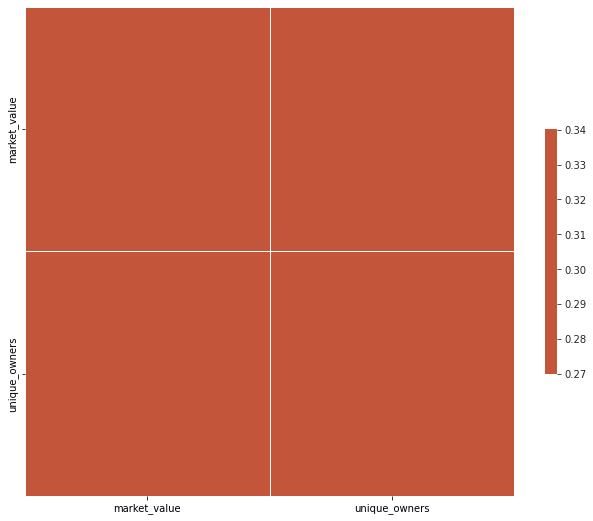

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
 #create a correlation matrix for all the column sets except the target variable
correlation = unique_owners_df_current_market_values_df.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")
 
 
#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html 
sns.set_style("white")
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

      unique_owners
7037             11
1789             23
575              15
1198              2
1533             10
...             ...
4273             71
7460             89
7700              1
4382              3
4790             11

[7433 rows x 1 columns]


      market_value
7037        0.5000
1789       22.6000
575         0.5025
1198        0.2000
1533        0.0000
...            ...
4273        0.0000
7460        0.1400
7700        0.0000
4382        0.0000
4790        0.0000

[7433 rows x 1 columns]


      unique_owners
2283            718
2645              2
2465             11
6770              5
7827              2
...             ...
4812            171
5005              1
6267              1
7435           1100
1099              2

[1859 rows x 1 columns]


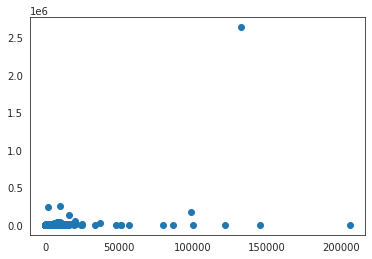

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

 
#Use only 1 feature - AGE to predict the target Y
value_y = unique_owners_df_current_market_values_df[['market_value']]
value_x = unique_owners_df_current_market_values_df[['unique_owners']]
 
#The scatterplot evidence that seemingly there is a trend
plt.scatter(value_x, value_y)
 
#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(value_x, value_y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)
 
 




The predicted market value for unique owners = 60 is:  [[1161.74279821]]
Coefficients: 
 [[2.2647502]]


Mean squared error:  49932868.59795594
Coefficient of determination:  -0.03860031934726016


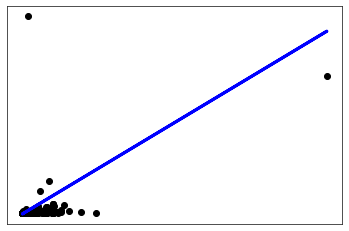

In [23]:

#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train, y_train)
 
# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred2 = regr.predict([[1000]])
print("\n")
print("The predicted market value for unique owners = 60 is: ", y_pred2)
 
# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()

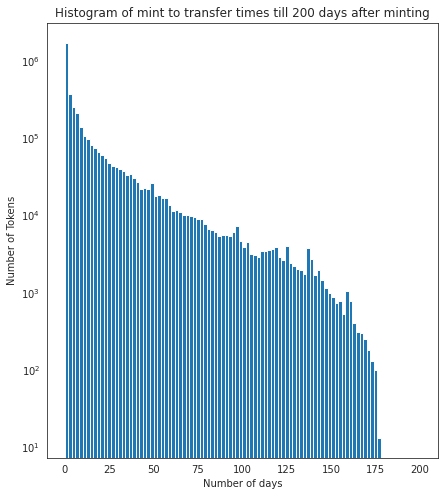

In [39]:
from matplotlib.pyplot import figure
figure(figsize=(7,8))
_, _, _ = plt.hist(transfers_with_mint_time['mint_to_xfer_seconds']/86400, bins=100,log='False',range=(0,200))
plt.xlabel('Number of days')
plt.ylabel('Number of Tokens')
plt.title('Histogram of mint to transfer times till 200 days after minting')
#plt.grid(True)
plt.show()

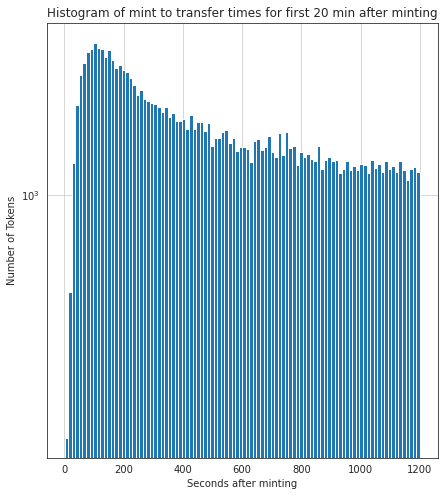

In [38]:
figure(figsize=(7,8))
_, _, _ = plt.hist(transfers_with_mint_time['mint_to_xfer_seconds'], bins=100,log='False',range=(1,1200))
# note the range starts at 1 to exclude mint-transfer pairs
plt.xlabel('Seconds after minting')
plt.ylabel('Number of Tokens')
plt.title('Histogram of mint to transfer times for first 20 min after minting')
plt.grid(True)
plt.show()

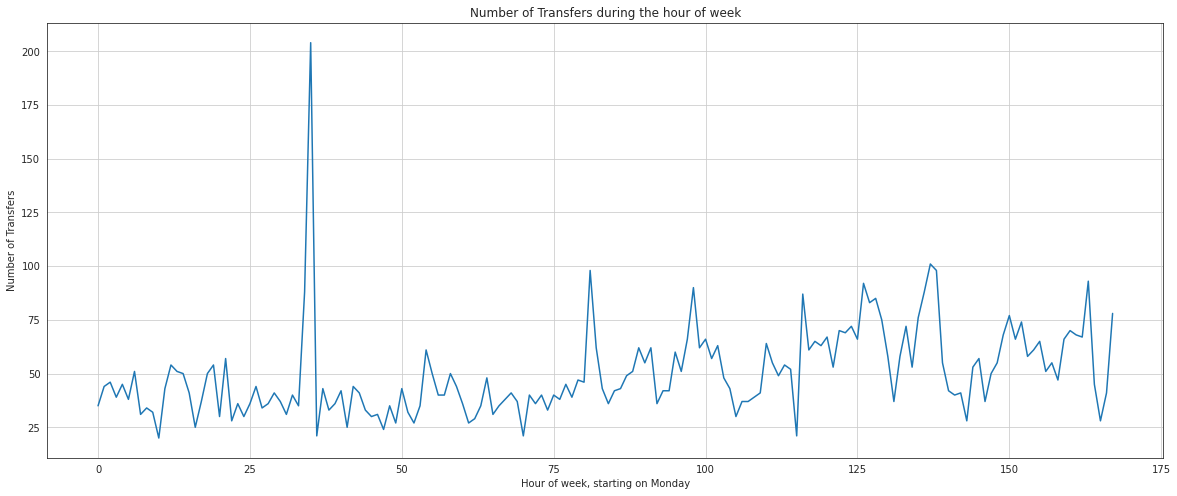

In [43]:
figure(figsize=(20,8))
early_bites = transfers_with_mint_time[transfers_with_mint_time.mint_to_xfer_seconds.between(1,70)]
early_by_days = early_bites.groupby('hourofweek').ctoken.count()
plt.plot(early_by_days)
plt.xlabel('Hour of week, starting on Monday')
plt.ylabel('Number of Transfers')
plt.title('Number of Transfers during the hour of week')
plt.grid(True)
plt.show()

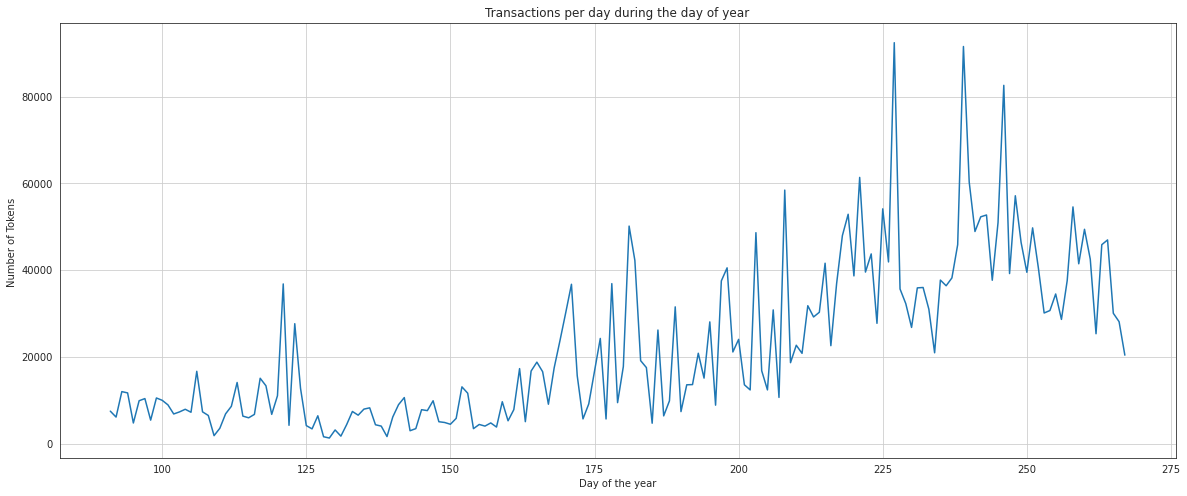

In [44]:
figure(figsize=(20,8))
tper_day = transfers_with_mint_time.groupby('day_of_year').ctoken.count()
plt.plot(tper_day[1:-1])
# first and last day are probably partial data
plt.xlabel('Day of the year')
plt.ylabel('Number of Tokens ')
plt.title('Transactions per day during the day of year')
plt.grid(True)
plt.show()